In [1]:
import pandas
import matplotlib
import seaborn
import numpy

import re

In [2]:
from itertools import cycle #

matplotlib.pyplot.style.use("ggplot")
color_pal = matplotlib.pyplot.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(matplotlib.pyplot.rcParams["axes.prop_cycle"].by_key()["color"])

In [3]:
tweets=pandas.read_csv('gameWords.csv')

In [4]:
tweets

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text
0,210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩
...,...,...,...,...,...
1178449,519,1594492773662871553,2022-11-21 00:47:56+00:00,MaureenLamont,Wordle 519 2/6\n\n⬜🟩🟨🟨⬜\n🟩🟩🟩🟩🟩
1178450,519,1594492932115124226,2022-11-21 00:48:33+00:00,Meeshbeer,Wordle 519 3/6\n\n⬜🟨🟩🟨⬜\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩
1178451,519,1594493005192658944,2022-11-21 00:48:51+00:00,BookChickie,Wordle 519 3/6\n\n⬛🟩🟩⬛🟩\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩
1178452,519,1594493051824754689,2022-11-21 00:49:02+00:00,aceynay,Wordle 519 3/6\n\n🟨🟩⬜⬜🟩\n🟩🟩🟩⬜🟩\n🟩🟩🟩🟩🟩\n\nI pla...


In [5]:
tweets.iloc[0]['tweet_text']#this a string (the colourful squares is unicode format)

'Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩'

In [6]:
tweets['tweet_text'][1]

'Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩'

In [7]:
#with print we have a very nice format:

In [7]:
print(tweets['tweet_text'][0])
#id=210    ,  4 out of 6 tries to solve

Wordle 210 4/6

⬛⬛🟨🟨⬛
🟩⬛⬛⬛⬛
🟩🟩🟨⬛⬛
🟩🟩🟩🟩🟩


In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178454 entries, 0 to 1178453
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   wordle_id       1178454 non-null  int64 
 1   tweet_id        1178454 non-null  int64 
 2   tweet_date      1178454 non-null  object
 3   tweet_username  1178454 non-null  object
 4   tweet_text      1178454 non-null  object
dtypes: int64(2), object(3)
memory usage: 45.0+ MB


In [9]:
tweets['tweet_date'] = pandas.to_datetime(tweets['tweet_date'])

In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178454 entries, 0 to 1178453
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype              
---  ------          --------------    -----              
 0   wordle_id       1178454 non-null  int64              
 1   tweet_id        1178454 non-null  int64              
 2   tweet_date      1178454 non-null  datetime64[ns, UTC]
 3   tweet_username  1178454 non-null  object             
 4   tweet_text      1178454 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 45.0+ MB


In [11]:
tweets['tweet_date'] = tweets['tweet_date'].dt.date #etsi afhnw mono tin imerominia kai feygei i ora

In [12]:
tweets

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text
0,210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩
...,...,...,...,...,...
1178449,519,1594492773662871553,2022-11-21,MaureenLamont,Wordle 519 2/6\n\n⬜🟩🟨🟨⬜\n🟩🟩🟩🟩🟩
1178450,519,1594492932115124226,2022-11-21,Meeshbeer,Wordle 519 3/6\n\n⬜🟨🟩🟨⬜\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩
1178451,519,1594493005192658944,2022-11-21,BookChickie,Wordle 519 3/6\n\n⬛🟩🟩⬛🟩\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩
1178452,519,1594493051824754689,2022-11-21,aceynay,Wordle 519 3/6\n\n🟨🟩⬜⬜🟩\n🟩🟩🟩⬜🟩\n🟩🟩🟩🟩🟩\n\nI pla...


In [13]:
tweets['attempts'] = tweets['tweet_text'].str[11].astype('int')

In [14]:
tweets.groupby('tweet_date').sum()

,wordle_id,tweet_id,attempts
tweet_date,,,
2022-01-16,573300.0,4.047457e+21,10414
2022-01-17,597085.0,4.196740e+21,11022
2022-01-18,501299.0,3.508048e+21,9060
2022-01-19,451636.0,3.146895e+21,9733
2022-01-20,576380.0,3.998014e+21,9647
...,...,...,...
2022-11-17,1652609.0,5.103365e+21,11530
2022-11-18,1460860.0,4.503719e+21,11416
2022-11-19,1713375.0,5.273049e+21,13264


In [15]:
tweets.groupby('tweet_date').count()

,wordle_id,tweet_id,tweet_username,tweet_text,attempts
tweet_date,,,,,
2022-01-16,2730,2730,2730,2730,2730
2022-01-17,2830,2830,2830,2830,2830
2022-01-18,2365,2365,2365,2365,2365
2022-01-19,2121,2121,2121,2121,2121
2022-01-20,2694,2694,2694,2694,2694
...,...,...,...,...,...
2022-11-17,3203,3203,3203,3203,3203
2022-11-18,2826,2826,2826,2826,2826
2022-11-19,3308,3308,3308,3308,3308


In [16]:
tweets.groupby('tweet_date').count()['tweet_id'].sort_values(ascending=False)

tweet_date
2022-01-28    15937
2022-02-11    13403
2022-02-28    10898
2022-02-15    10032
2022-03-09     9675
              ...  
2022-01-19     2121
2022-09-16     1292
2022-08-06      264
2022-09-05      180
2022-11-21      144
Name: tweet_id, Length: 308, dtype: int64

In [17]:

tweets['tweet_date'].value_counts()

2022-01-28    15937
2022-02-11    13403
2022-02-28    10898
2022-02-15    10032
2022-03-09     9675
              ...  
2022-01-19     2121
2022-09-16     1292
2022-08-06      264
2022-09-05      180
2022-11-21      144
Name: tweet_date, Length: 308, dtype: int64

In [18]:
tweets['wordle_id'].value_counts()#how many times has a tweet beed solved

223    15776
254    10771
237    10160
236    10054
251     9089
       ...  
212     2399
491     2291
483     2165
213     2119
454     1172
Name: wordle_id, Length: 306, dtype: int64

In [19]:
tweets['wordle_id'].nunique()#306 unique tweets

306

<AxesSubplot: title={'center': 'Wordle Tweets by Day'}>

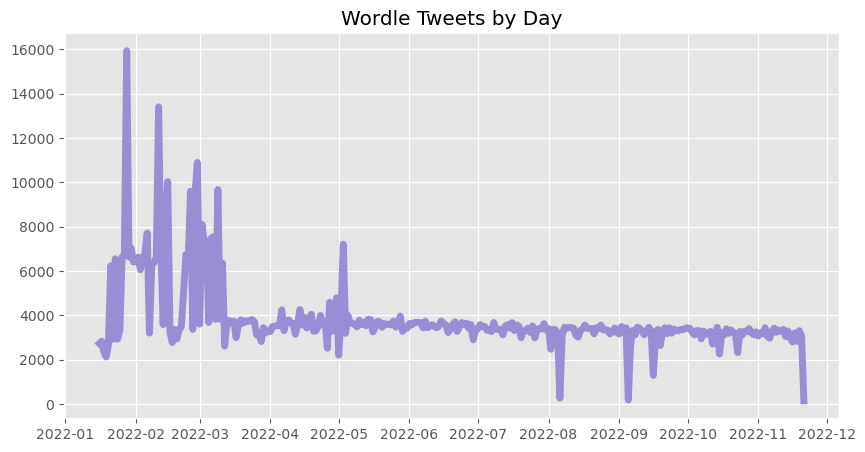

In [20]:
tweets['tweet_date'].value_counts().plot(figsize=(10, 5), title='Wordle Tweets by Day',color=color_pal[2], lw=5)

In [21]:
tweets

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,attempts
0,210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,4
1,210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,4
2,210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,4
3,210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,3
4,210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,3
...,...,...,...,...,...,...
1178449,519,1594492773662871553,2022-11-21,MaureenLamont,Wordle 519 2/6\n\n⬜🟩🟨🟨⬜\n🟩🟩🟩🟩🟩,2
1178450,519,1594492932115124226,2022-11-21,Meeshbeer,Wordle 519 3/6\n\n⬜🟨🟩🟨⬜\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩,3
1178451,519,1594493005192658944,2022-11-21,BookChickie,Wordle 519 3/6\n\n⬛🟩🟩⬛🟩\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩,3
1178452,519,1594493051824754689,2022-11-21,aceynay,Wordle 519 3/6\n\n🟨🟩⬜⬜🟩\n🟩🟩🟩⬜🟩\n🟩🟩🟩🟩🟩\n\nI pla...,3


In [22]:
tweets.groupby('wordle_id')['attempts'].value_counts()#attempts per word

wordle_id  attempts
210        4           1064
           3            897
           5            489
           2            222
           6            165
                       ... 
519        4            881
           5            877
           3            567
           6            525
           2            203
Name: attempts, Length: 1530, dtype: int64

In [23]:
tweets.groupby('wordle_id')['attempts'].value_counts().loc[210]

attempts
4    1064
3     897
5     489
2     222
6     165
Name: attempts, dtype: int64

In [24]:
tweets.groupby('wordle_id')['attempts'].value_counts().iloc[0]

1064

In [25]:
#SOS SOS SOS SOS
tweets.groupby('wordle_id')['attempts'].value_counts().unstack()
#attempts -> columns

attempts,2,3,4,5,6
wordle_id,,,,,
210,222,897,1064,489,165
211,196,903,1016,564,215
212,191,787,820,413,188
213,51,260,630,697,481
214,383,1012,823,363,122
...,...,...,...,...,...
515,129,502,745,769,649
516,486,1110,1106,439,105
517,51,626,1347,629,160


In [26]:
tweets.groupby('wordle_id')['attempts'].value_counts() .unstack() .style.background_gradient(axis=1)

attempts,2,3,4,5,6
wordle_id,,,,,
210,222,897,1064,489,165
211,196,903,1016,564,215
212,191,787,820,413,188
213,51,260,630,697,481
214,383,1012,823,363,122
215,246,877,1017,579,224
216,461,1952,2078,1199,415
217,102,566,1031,843,418
218,170,1009,1384,730,187


In [27]:
tweets['attempts'].value_counts()

4    405714
5    292143
3    275860
6    135477
2     69260
Name: attempts, dtype: int64

In [28]:
tweets['attempts'].value_counts().sort_index()

2     69260
3    275860
4    405714
5    292143
6    135477
Name: attempts, dtype: int64

Text(0, 0.5, 'Number of Attempts Solved in')

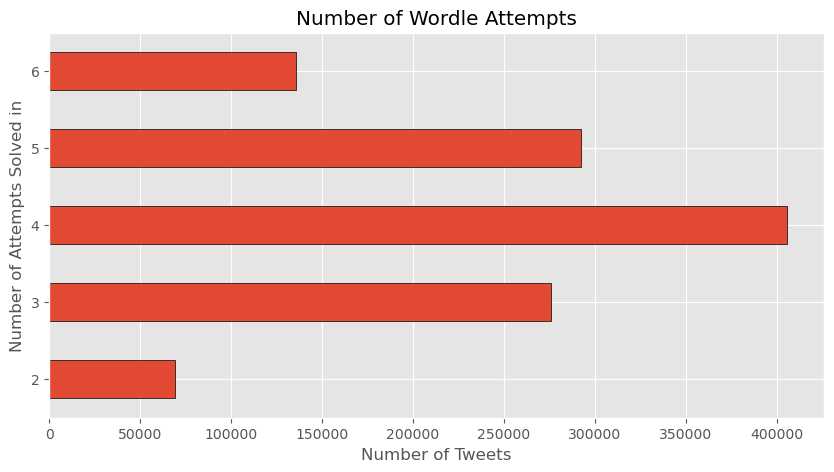

In [29]:
ax = tweets['attempts'].value_counts() .sort_index() .plot(figsize=(10, 5),kind='barh',title='Number of Wordle Attempts',edgecolor='black')
ax.set_xlabel('Number of Tweets')
ax.set_ylabel('Number of Attempts Solved in')

In [30]:
print(tweets['tweet_text'][0])
#black = wrong letter
#yellow = correct letter wrong position
#green = OK

Wordle 210 4/6

⬛⬛🟨🟨⬛
🟩⬛⬛⬛⬛
🟩🟩🟨⬛⬛
🟩🟩🟩🟩🟩


In [31]:
tweets['tweet_text']

0               Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1               Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2               Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3                      Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4                      Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩
                                 ...                        
1178449                       Wordle 519 2/6\n\n⬜🟩🟨🟨⬜\n🟩🟩🟩🟩🟩
1178450                Wordle 519 3/6\n\n⬜🟨🟩🟨⬜\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩
1178451                Wordle 519 3/6\n\n⬛🟩🟩⬛🟩\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩
1178452    Wordle 519 3/6\n\n🟨🟩⬜⬜🟩\n🟩🟩🟩⬜🟩\n🟩🟩🟩🟩🟩\n\nI pla...
1178453    Wordle 519 2/6\n\n🟨🟨⬜⬜🟩\n🟩🟩🟩🟩🟩\n\n⁦@ScoreMyWor...
Name: tweet_text, Length: 1178454, dtype: object

In [32]:
tweets['tweet_text'] = tweets['tweet_text'].str.replace('⬜','⬛')

In [33]:
#no more white squares

In [34]:
tweets

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,attempts
0,210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,4
1,210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬛⬛⬛⬛⬛\n🟩🟩🟨🟨⬛\n🟩🟩⬛🟩🟨\n🟩🟩🟩🟩🟩,4
2,210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬛⬛⬛🟨⬛\n⬛🟩⬛🟨⬛\n⬛🟩⬛🟨⬛\n🟩🟩🟩🟩🟩,4
3,210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟨🟨⬛⬛⬛\n🟩🟩🟩🟩🟩,3
4,210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,3
...,...,...,...,...,...,...
1178449,519,1594492773662871553,2022-11-21,MaureenLamont,Wordle 519 2/6\n\n⬛🟩🟨🟨⬛\n🟩🟩🟩🟩🟩,2
1178450,519,1594492932115124226,2022-11-21,Meeshbeer,Wordle 519 3/6\n\n⬛🟨🟩🟨⬛\n⬛🟩🟩🟩🟩\n🟩🟩🟩🟩🟩,3
1178451,519,1594493005192658944,2022-11-21,BookChickie,Wordle 519 3/6\n\n⬛🟩🟩⬛🟩\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩,3
1178452,519,1594493051824754689,2022-11-21,aceynay,Wordle 519 3/6\n\n🟨🟩⬛⬛🟩\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩\n\nI pla...,3
